In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from operator import itemgetter
from statistics import mean 

<h2>Funciones de prueba</h2>

In [5]:
def plotFunction(limInf, limSup, n, F):
  print(limInf, limSup, n)
  x1 = np.linspace(limInf[0], limSup[0], n)
  x2 = np.linspace(limInf[1], limSup[1], n)
  X, Y = np.meshgrid(x1, x2)


  FX = list()
  temp = list()

  for i in range(len(X)):
    for j in range(len(X)):
      val = F([X[i][j],Y[i][j]])
      temp.append(val)
      
    FX.append(temp.copy())
    temp.clear()

  FX = np.array(FX)

  fig = plt.figure()
  ax = plt.axes(projection='3d')
  #ax.contour3D(X, Y, FX, 50, cmap='binary')
  ax.plot_surface(X, Y, FX, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')

<h3>Función de la esfera</h3>


$F esfera(x) = \sum_{i=1}^n x_i^2$

[-5.12, -5.12] [5.12, 5.12] 100


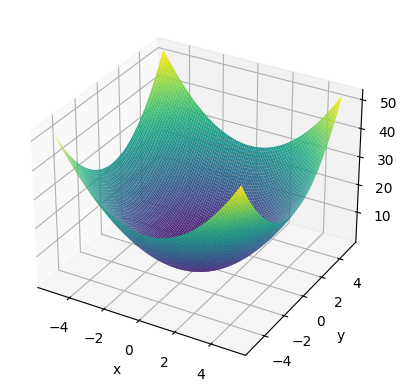

In [6]:
def sphere_function(x):
    """
    Función de prueba de la esfera.
    x: Vector de variables de decisión.
    """
    n = len(x)
    sum = 0
    for i in range(n):
        sum += x[i]**2
    return sum

plotFunction([-5.12,-5.12], [5.12,5.12],100, sphere_function)


<h3>Función de Rosenbrock</h3>

$F rosenbrock(x) = \sum_{i=1}^{n-1} 100(x_i^2 - x_{i+1})^2 + (1-x_i)^2$

[-2.048, -2.048] [2.048, 2.048] 100


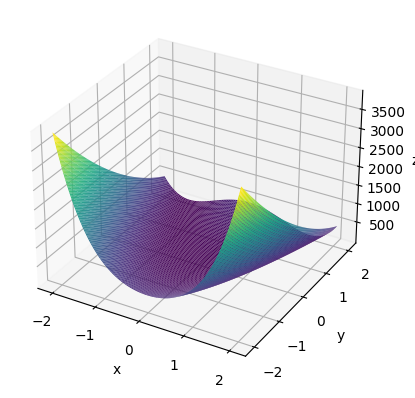

In [7]:
def rosenbrock_function(x):
    """
    Función de prueba de la Rosenbrock.
    x: Vector de variables de decisión.
    """
    n = len(x)-1
    sum = 0
    for i in range(n):
        sum += 100*(x[i]**2-x[i+1])**2 + (1-x[i])**2
    return sum



plotFunction([-2.048,-2.048], [2.048,2.048],100, rosenbrock_function)

<h3>Función de Ackley</h3>

$f(x) = -20\exp\left(-0.2\sqrt{\frac{1}{n}\sum_{i=1}^{n}x_i^2}\right)-\exp\left(\frac{1}{n}\sum_{i=1}^{n}\cos(2\pi x_i)\right)+20+e$



[-32.768, -32.768] [32.768, 32.768] 200


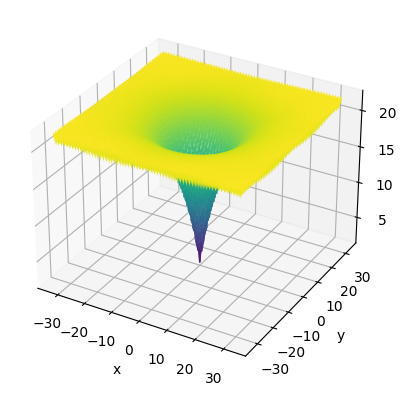

In [8]:
def ackley_function(x):
    x = np.array(x)
    n = len(x)
    sum1 = np.sum(x**2)
    sum2 = np.sum(np.cos(2*math.pi*x))
    term1 = -20 * math.exp(-0.2 * math.sqrt(sum1/n))
    term2 = -math.exp(sum2/n)
    return term1 + term2 + 20 + np.e

plotFunction([-32.768,-32.768], [32.768,32.768],200,ackley_function)

In [9]:
def calculaAptitud(X, mode):
  if mode == 0:
    return sphere_function(X)
  elif mode == 1:
    return rosenbrock_function(X)
  elif mode == 2: 
    return ackley_function(X) 

<h2>Codificacion y decodificacion binaria</h2>

In [10]:
def reparacion(solucion, limites_inferiores, limites_superiores):
    """
    Implementa una estrategia de reparación para soluciones fuera de los límites inferior o superior de cada variable.

    Args:
        solucion (np.array): Solución a reparar.
        limites_inferiores (np.array): Límites inferiores de cada variable.
        limites_superiores (np.array): Límites superiores de cada variable.

    Returns:
        np.array: Solución reparada.
    """
    # Copia la solución original para evitar modificarla directamente




    solucion_reparada = np.array([solucion.copy()], dtype=np.float64)
    limites_inferiores = np.array([limites_inferiores.copy()], dtype=np.float64)
    limites_superiores = np.array([limites_superiores.copy()], dtype=np.float64)
    
    # Recorre cada variable en la solución
    for i in range(len(solucion)):
        # Si el valor de la variable está por debajo del límite inferior,
        # lo ajusta al límite inferior
        if solucion[i] < limites_inferiores[i]:
            solucion_reparada[i] = limites_inferiores[i]
        # Si el valor de la variable está por encima del límite superior,
        # lo ajusta al límite superior
        elif solucion[i] > limites_superiores[i]:
            solucion_reparada[i] = limites_superiores[i]
    
    return solucion_reparada


In [11]:
def decNum(minVal, maxVal):
    strMaxVal = str(maxVal)
    numDecimalesMaxVal = len(strMaxVal) - strMaxVal.find('.') - 1

    strMinVal = str(minVal)
    numDecimalesMinVal = len(strMinVal) - strMinVal.find('.') - 1

    numDecimales = max([numDecimalesMaxVal, numDecimalesMinVal])

    lenCode = math.ceil(math.log2((maxVal*(10**numDecimales)) - (minVal*(10**numDecimales))))
    
    return numDecimales, lenCode

def codificacion(minVal, maxVal, valToCode):


    valToCode = reparacion(valToCode, minVal, maxVal)

    solCode = list()

    for i in range(len(valToCode)):

        numDecimales, lenCode = decNum(minVal[i], maxVal[i])

        numDecimales = 4

        binCode = bin(int((valToCode[i]*(10**numDecimales)) - (minVal[i]*(10**numDecimales))))
        binCode = binCode[2:]

        code = ''

        if len(binCode) == lenCode:
            code = binCode
        else:
            for i in range(lenCode - len(binCode)):
                code += '0'
            code += binCode

        solCode.append(code)

    return solCode

def decodificacion(minVal=[], maxVal = [], valToDecode = []):
    
    decSolutions = []

    for i in range(len(valToDecode)):
        numDecimales = 4
        decSol = (int(valToDecode[i], 2) + (minVal[i]*(10**numDecimales)))/10**numDecimales
        

        if decSol > maxVal[i]:
            decSolutions.append('')
        else:
            decSolutions.append(decSol)

    return decSolutions



Esta es la prueba de la codificación y decodificación para los intervalos de 0.35 a 1.40 con resolución de 4 decimales y un valor de 0.39 

In [12]:
maxVal = [1.40]
minVal = [0.35]
target = [0.39]

code = codificacion(minVal,maxVal,target)
decode = decodificacion(minVal,maxVal,code)
print(f'La codificacion de {target[0]} en el intervalo de {minVal[0]} a {maxVal[0]} con una presición de 4 decimales es: {code[0]} y la decodificacion es: {decode[0]}')

La codificacion de 0.39 en el intervalo de 0.35 a 1.4 con una presición de 4 decimales es: 110010000 y la decodificacion es: 0.39


Esta es la prueba de la codificación y decodificación para los intervalos de 5.25 a 10.10 con resolución de 4 decimales y un valor de 8.967

In [13]:
maxVal = [10.10]
minVal = [5.25]
target = [8.967]

code = codificacion(minVal,maxVal,target)
decode = decodificacion(minVal,maxVal,code)
print(f'La codificacion de {target[0]} en el intervalo de {minVal[0]} a {maxVal[0]} con una presición de 4 decimales es: {code[0]} y la decodificacion es: {decode[0]}')

La codificacion de 8.967 en el intervalo de 5.25 a 10.1 con una presición de 4 decimales es: 1001000100110010 y la decodificacion es: 8.967


In [14]:
maxVal = [10.1012]
minVal = [5.25]
target = [11]

code = codificacion(minVal,maxVal,target)
decode = decodificacion(minVal,maxVal,code)
print(f'La codificacion de {target[0]} en el intervalo de {minVal[0]} a {maxVal[0]} con una presición de 4 decimales es: {code[0]} y la decodificacion es: {decode[0]}')

La codificacion de 11 en el intervalo de 5.25 a 10.1012 con una presición de 4 decimales es: 1011110110000000 y la decodificacion es: 10.1012


In [15]:
maxVal = [10.10]
minVal = [5.25]
target = [4]

code = codificacion(minVal,maxVal,target)
decode = decodificacion(minVal,maxVal,code)
print(f'La codificacion de {target[0]} en el intervalo de {minVal[0]} a {maxVal[0]} con una presición de 4 decimales es: {code[0]} y la decodificacion es: {decode[0]}')

La codificacion de 4 en el intervalo de 5.25 a 10.1 con una presición de 4 decimales es: 000000000 y la decodificacion es: 5.25


<h2>Estrategia de selección de padres</h2>

<h3>La ruleta</h3>

In [113]:
def seleccion_ruleta(poblacion, fitness):
    # Normalizar el fitness
    probabilidad = fitness / np.sum(fitness)
    probAcumulada = np.cumsum(probabilidad)
    r = np.random.uniform(0, 1, size=len(poblacion))
    print(r)
        
    #return padres

<h3>Sobrante estocástico sin remplazo</h3>

In [17]:
def sser_selection(population, fitness, num_parents):
    # Normalizar los valores de fitness
    fitness_norm = fitness / np.sum(fitness)

    # Crear una lista de índices de la población
    idx_population = np.arange(len(population))

    # Crear un array para guardar los padres seleccionados
    parents = np.empty((num_parents, len(population[0])), dtype=population.dtype)

    # Calcular el número de individuos que serán seleccionados por intervalo
    individuals_per_interval = np.floor(num_parents / len(population)).astype(int)

    # Crear un array con n puntos aleatorios dentro del rango [0, 1/n]
    r = np.random.uniform(size=individuals_per_interval) / len(population)

    # Seleccionar los individuos de cada intervalo
    for i in range(len(population)):
        # Calcular los límites del intervalo actual
        lower_bound = i / len(population)
        upper_bound = (i + 1) / len(population)

        # Seleccionar los puntos aleatorios dentro del intervalo
        idx_selected = np.where((lower_bound <= r) & (r < upper_bound))[0]

        # Seleccionar los individuos correspondientes a los puntos aleatorios
        idx_individuals = np.random.choice(idx_population[fitness_norm.argsort()[::-1]],
                                            size=len(idx_selected),
                                            replace=False)

        # Guardar los individuos seleccionados
        parents[idx_selected] = population[idx_individuals]

    return parents


<h3>Sobrante estocástico con remplazo</h3>

In [18]:
def stochastic_remainder_with_replacement(population, fitness, num_parents):
    # Normalize fitness values
    normalized_fitness = fitness / np.sum(fitness)
    # Initialize array to hold selected parents
    parents = np.zeros((num_parents, population.shape[1]))
    # Calculate the number of times each individual should be selected
    num_copies = np.floor(normalized_fitness * num_parents)
    # Calculate the remainder probabilities
    remainder_probs = normalized_fitness - num_copies
    # Add the individuals with the highest remainders until the parent array is full
    i = 0
    while np.sum(num_copies) < num_parents:
        remainder_inds = np.argsort(remainder_probs)[::-1][:num_parents - np.sum(num_copies)]
        num_copies[remainder_inds] += 1
    # Select parents with replacement
    parent_index = 0
    for i in range(population.shape[0]):
        for j in range(int(num_copies[i])):
            parents[parent_index,:] = population[i,:]
            parent_index += 1
    return parents


<h3>Universal estocástica</h3>

In [19]:
def universal_stochastic_selection(population, fitness):
    total_fitness = np.sum(fitness)
    num_parents = len(population)
    section_size = total_fitness / num_parents
    start_point = np.random.uniform(0, section_size)
    pointers = np.arange(start_point, total_fitness, section_size)
    parents = []
    for i in range(num_parents):
        j = 0
        while fitness[j] < pointers[i]:
            j += 1
        parents.append(population[j])
    return parents


<h3>Muestreo determinístico</h3>

In [20]:
def deterministicSampling(population, numParents):
    sortedPop = sorted(population, key=lambda x: x.fitness, reverse=True)
    intervalSize = int(len(population) / numParents)
    selectedParents = []
    for i in range(numParents):
        selectedParents.append(sortedPop[i * intervalSize])
    return selectedParents

<h2>Estrategía de selección de sobrevivientes (selección exintiva)<h2>

In [21]:
def seleccion_extintiva(poblacion, n):
    """
    Realiza la selección extintiva en una población de individuos.

    Args:
        poblacion (list): Lista de individuos en la población. Cada individuo es un arreglo numpy con dos elementos:
                          un vector de valores de entrada y un valor de salida.
        n (int): Número de individuos a sobrevivir en cada generación.

    Returns:
        list: Lista de los n mejores individuos después de la selección.
    """
    # Ordenar la población de acuerdo a la aptitud (valor de salida) en orden descendente
    poblacion_ordenada = sorted(poblacion, key=lambda x: x[1], reverse=True)
    
    # Seleccionar los n mejores individuos
    seleccionados = poblacion_ordenada[:n]
    
    return seleccionados

<h2>Operador de cruza</h2>

<p>Cruza de dos puntos</p>

In [22]:

def crossover_two_points(parent1, parent2):
    """
    Realiza la recombinación de cruza de dos puntos entre dos padres.

    Args:
        parent1 (list): Lista que representa el primer padre.
        parent2 (list): Lista que representa el segundo padre.

    Returns:
        tuple: Tupla con los dos hijos resultantes de la cruza.
    """
    # Obtener el tamaño de los padres
    size = len(parent1)

    # Generar dos puntos de cruza aleatorios
    point1 = random.randint(0, size - 1)
    point2 = random.randint(point1 + 1, size)

    # Realizar la cruza en los dos puntos
    child1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
    child2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]

    return child1, child2


<p>Cruza uniforme</p>

In [23]:
def crossover_uniform(parent1, parent2, probability=0.5):
    """
    Realiza la recombinación de cruza uniforme entre dos padres.

    Args:
        parent1 (list): Lista que representa el primer padre.
        parent2 (list): Lista que representa el segundo padre.
        probability (float): Probabilidad de intercambiar genes (default: 0.5).

    Returns:
        tuple: Tupla con los dos hijos resultantes de la cruza.
    """
    # Obtener el tamaño de los padres
    size = len(parent1)

    # Inicializar los hijos con genes del padre 1 y padre 2
    child1 = [0] * size
    child2 = [0] * size

    # Realizar la cruza uniforme
    for i in range(size):
        if random.random() < probability:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]

    return child1, child2


<h2>Operador de mutación</h2>

In [24]:
def mutacion(cromosoma, delta, porcMuta):
  nuevo_crom =[]
  for gen in cromosoma:
    if random.uniform(0,1) <= porcMuta:
      if random.uniform(0,1) <= 0.5:
        gen += delta
      else:
        gen -= delta
    nuevo_crom.append(gen)
  return nuevo_crom

<h2>Estructura del algoritmo genetico</h2>

<h3>Definición de límites de las soluciones</h3>

Hasta este punto ya se probaron todas los benchmarks, ahora es necesario definir los arreglos de 10 dimensiones que contengan los limites superiores e inferiores de cada uno de los benchmarks

In [25]:
numVar = 5
esferaMinVal = np.full(numVar,-5.12)
esferaMaxVal = np.full(numVar, 5.12)

rosenbrockMinVal = np.full(numVar,-2.048)
rosenbrockMaxVal = np.full(numVar, 2.048)

ackleyMinVal = np.full(numVar,-32.768)
ackleyMaxVal = np.full(numVar, 32.768)

<h3>Inicialización la población</h3>

In [26]:
def poblacionInicial(tam, numVar, limInf, limSup, mode):

  if mode == 0:
    function = sphere_function
  elif mode == 1:
    function = rosenbrock_function
  elif mode == 2:
    function = ackley_function

  poblacion = []
  for i in range(0, tam): 
    X = []
    for j in range(0, numVar):
      X.append(random.uniform(limInf[j], limSup[j]))
   
    fx = function(X)
    poblacion.append([X, fx])
  return poblacion

<h3>Selección de padres</h3>

In [28]:
def seleccionPadres(pob, mode):

    poblacion = [sublista[0] for sublista in pob]
    fitness = [sublista[1] for sublista in pob]
    numPadres = len(pob)

    if mode == 0:
        return seleccion_ruleta(poblacion, fitness)
    elif mode == 1:
        return sser_selection(poblacion, fitness, numPadres)
    elif mode == 2:
        return stochastic_remainder_with_replacement(poblacion, fitness, numPadres)
    elif mode == 3:
        universal_stochastic_selection(poblacion, fitness)
    elif mode == 4:
        return deterministicSampling(poblacion, numPadres)

<h3>Cruza de padres con cierta probabilidad</h3>

In [29]:
def cruza(padres, indices, mode, prob_cruza, tamPob):

    hijos = list()
    i = 0

    while i < tamPob:

        padre1 = padres[indices[i]]
        padre2 = padres[indices[i+1]]

        if random.uniform(0,1) <= prob_cruza:
            if mode == 0:
                hijos.append(crossover_two_points(padre1, padre2)) 
            elif mode == 1:
                hijos.append(crossover_uniform(padre1, padre2))
                
        i+=2
        
    return hijos
    

In [ ]:
a = poblacionInicial(5,5,0,10,0)


<h2>Implementación del algoritmo génetico</h2>

In [111]:
def algoritmoGenetico(nVariables, limInf, limSup, tamPoblacion, porcCruza, porcMuta, funcionPrueba, sPadres, oCruza):
  #genera poblacion inicial 
  padres = poblacionInicial(tamPoblacion, nVariables, limInf, limSup,funcionPrueba)
  print("Poblacion inicial ", padres)
  print("===========================")

  mejores = list()
  peores = list()
  promedio = list()

  epsilon = 0.001

  if funcionPrueba == 0:
    target = sphere_function(np.zeros(nVariables))
  elif funcionPrueba == 1:
    target = rosenbrock_function(np.ones(nVariables))
  elif funcionPrueba == 2:
      target = ackley_function(np.zeros(nVariables))
  
  #repite mientras no se alcance criterio de paro
  while True:
    
    #crea parejas de padres
    indices = seleccionPadres(padres, sPadres)
    print("Parejas", indices)
    #aplica operador de cruza por cada pareja (para generar hijos)
    hijos = cruza(padres, indices, oCruza, porcCruza, tamPoblacion)
    #print("longitud de hijos", len(hijos))
    #print(hijos)

    #aplica operador de mutacion 
    hijos2 = list()
    for hijo in hijos:
      mutado = mutacion(hijo, 0.1, porcMuta)
      hijos2.append([mutado, calculaAptitud(mutado)])
    #print("hijos mutados", hijos2)
  
    #unir padres y descendientes 
    nuevaPoblacion = padres + hijos2
    print("longitud de padres e hijos", len(nuevaPoblacion))
    #print("nueva poblacion", nuevaPoblacion)
  
    #selecciona los sobrevivientes
    sobrevivientes = sorted(nuevaPoblacion, key=itemgetter(1), reverse = True)
    print("ordenada", sobrevivientes)
    padres = sobrevivientes[0: tamPoblacion]
    print("nuevos padres (sobrevivientes)", padres)
    #registra los valores del mejor y peor individuo por generación
    mejores.append(padres[0][1])
    peores.append(padres[-1][1])
    #calcula la aptitud promedio de la población en cada generación
    prom = 0
    for p in padres:
      prom += p[1]
    promedio.append(prom/len(padres))

    fitness = [sublista[1] for sublista in padres]
    mejor = min(fitness)

    fitnessMejores = [sublista[1] for sublista in mejores]
    fitnessPeores = [sublista[1] for sublista in peores]
    fit1 = min(fitnessMejores)
    fit2 = min(fitnessPeores)

    if  np.abs(mejor - target) <= epsilon:
      break
    elif np.abs(fit1-fit2) <= target:
      break
    else:
      pass
     

  print("mejor solucion", padres[0])


  return mejores, peores, promedio

In [114]:
mejores, peores, promedio = algoritmoGenetico(5,esferaMinVal, esferaMaxVal,200,0.8,0.2,0,0,0)

Poblacion inicial  [[[-1.126668752892133, 1.4323995942939165, 4.264543984424196, -4.0998120603951, 0.9565062024766267], 39.23084951750286], [[2.2526158563837546, 2.3372018910406993, -3.327705303424334, 5.035451644160951, -2.0323220857432567], 51.096519783237234], [[3.832841467370831, -3.324599135194702, 2.613531556002301, -4.956107150600725, 1.602132988345745], 59.704008518535865], [[4.708669140828039, 3.9509183790447393, -0.7280923141120219, -3.09107877887973, -3.0498257615224613], 57.16764472641543], [[-2.5938618173630053, 3.9677508068437293, -2.623077148381967, 3.849231343311195, 3.782252223978513], 58.47371313926616], [[2.6989793674569516, 0.40854038622661726, 1.5141531630075455, 2.413665670011296, -1.7301963921608547], 18.56341619621979], [[-3.7094683309299503, -3.0234343586946535, 2.116848724420066, -1.1047183357913113, -3.6744976451483002], 42.10469468722037], [[-3.268360916131347, -3.158877066578367, 2.1415791903035846, -4.290092813522864, 2.3192415762909704], 49.03082666602819

C:\Users\jisus\AppData\Local\Temp\ipykernel_24056\804702563.py:3: RuntimeWarning: invalid value encountered in long_scalars
  probabilidad = fitness / np.sum(fitness)


TypeError: 'NoneType' object is not subscriptable

73
